In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [92]:
# System imports
from os import path
import math

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from scipy.interpolate import griddata
import scipy.sparse.linalg
from skimage import color, data, restoration
from ksvd import ApproximateKSVD
from spgl1 import spg_bp
from sklearn.decomposition import DictionaryLearning

datadir = "/Users/jho/cs445/final_project/Single-Image-Deblurring/" 

import utils
from utils.utils import gaussian_kernel, matlab_style_gauss2D as gaussian_kernel, matlab_style_gauss2D
from utils.odctdict import odctdict as odctdict

In [141]:
# algorithm from: https://www.math.ucla.edu/~bertozzi/papers/DirectSparseDeblurring.pdf
def direct_sparse(img, D, kernel, skip=(10,10)):
    """
    @brief      Direct sparese algoritm by Yifei Lou that solves the deblur problem with
                known kernel. This function also tries to reconstruct the image.
                
    @param      img      blurred image
    @param      D        dictionary
    @param      kernel   kernel
    
    @return     no idea yet
    """
    n, m = D.shape
    kernel_size = kernel.shape[0]
    
    patch_size = int(np.sqrt(n))
    
    i_size, j_size = 0, 0
    for i in range(0, blur_img.shape[0]-n, skip[0]):
        i_size += 1
    for j in range(0, blur_img.shape[1]-n, skip[1]):
        j_size += 1
    
    D_hat = cv2.filter2D(D, -1, kernel)
    I_hat = restoration.richardson_lucy(blur_img, kernel)
    
    Alpha_next = np.zeros((i_size, j_size, m))
    patch = blur_img[0:0+patch_size, 0:0+patch_size]
    alpha,resid,grad,info = spg_bp(D_hat, patch.reshape(-1))
#     aksvd = ApproximateKSVD(n_components=n)
    
    I_p_hat = I_hat[0:0+patch_size, 0:0+patch_size]
    
#     print(D_next.shape)
#     for i in range(0, blur_img.shape[0]-n, skip[0]):
#         for j in range(0, blur_img.shape[1]-n, skip[1]):
#             i_index, j_index = int(i/skip[0]), int(j/skip[1])
#             patch = blur_img[i:i+patch_size, j:j+patch_size]
            
#             Alpha_next[i_index, j_index],resid,grad,info = spg_bp(D_hat, patch.reshape(-1))
#             D_next
            
            
            
    
#     D_hat = cv2.filter2D(D, -1, kernel)
#     B = blur_img[0:0+patch_size, 0:0+patch_size]
# #     Alpha = np.zeros((i_size, j_size, m))
#     alpha,resid,grad,info = spg_bp(D_hat, B.reshape(-1))
    
#     I_p_hat = restoration.richardson_lucy(B, kernel)
#     aksvd = ApproximateKSVD(n_components=n)
#     D_next = aksvd.fit(I_p_hat - (D@alpha).reshape(I_p_hat.shape)).components_
# #     alpha,resid,grad,info = spg_bp(D_hat, B.reshape(-1))
#             Alpha[i_index,j_index],resid,grad,info = spg_bp(D_hat, b)
            
            
#     patch = blur_img[0:0+patch_size, 0:0+patch_size]
#     b = patch.reshape(-1)
#     alpha,resid,grad,info = spg_bp(D_hat, b)
            
    
#     for i in range(0, blur_img.shape[0]-n):
#         for j in range(0, blur_img.shape[1]-n):
#             I_p = blur_img[i:i+patch_size, j:j+patch_size]
#             I_p_hat = restoration.richardson_lucy(I_p, kernel, iterations=iters) 
#     I_p_hat = restoration.richardson_lucy(patch, kernel, iterations=iters) 
#     aksvd = ApproximateKSVD(n_components=n)
#     D_next = aksvd.fit(I_p_hat - (D@alpha).reshape(I_p_hat.shape)).components_    
    return 0, 0
#     return alpha, D_next
    
#             patch = blur_img[i:i+patch_size, j:j+patch_size]
#             I_p = patch.reshape(-1)
#             Alpha[i,j] = np.linalg.lstsq(D, I_p, rcond=None)[0]
            
#     Alpha_next = np.zeros(Alpha.shape)
#     for i in range(0, blur_img.shape[0]-n):
#         for j in range(0, blur_img.shape[1]-n):
            
            
    
    

In [142]:
def estimate_kernel(blur_img, kernel_size, lambda_=5, block_size=(3,3)):
    # need denom to get to get weights. Now I think i have everything...
    
    # this is for reference
    numerator = 0
    denominator = 0

    # sum(weight * irradience) / sum(irradience) 
    for n, image in enumerate(ldr_images):
        z_ij = image[im_h][im_w][color]
        numerator += w(z_ij)*(z_ij / exposure_times[n])
        denominator += w(z_ij)

    # numerator = sum(weight * irradience) 
    # denominator = sum(irradience) 
    hdr_image[im_h, im_w, color] = numerator / denominator
    
    return blur_img

In [143]:
def deblur(blur_img, kernel_size=7, patch_size=12, iters=6, start_loc=(0,0), blur_strength = 0.4):
    kernel = matlab_style_gauss2D((kernel_size, kernel_size), blur_strength)
    patch = blur_img[start_loc[0]:start_loc[0]+patch_size, start_loc[0]:patch_size]
    
    delta = 0.0001
    prev_error = 0
    
    n = patch_size**2
    m = 10*n
    
    D = odctdict(n, m)
    
    alpha, D = direct_sparse(blur_img, D, kernel)
#     kernel = estimate_kernel(blur_img, alpha, D, kernel_size)
#     for t in range(iters):
#         deblur_img = direct_sparse(blur_img, D, kernel)
#         kernel = estimate_kernel(deblur_img, blur_img, kernel_size)
    

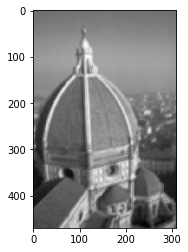

(1,)


In [144]:
blur_img_name = 'data/blurred.jpg'
# blur_img = cv2.cvtColor(cv2.imread(blur_img_name), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
blur_img = cv2.cvtColor(cv2.imread(blur_img_name), cv2.COLOR_BGRA2GRAY).astype('double') / 255.0  
plt.imshow(blur_img, cmap='gray')
plt.show()

deblur(blur_img)
# psf = np.ones((5, 5)) / 25
# deconvolved_RL = restoration.richardson_lucy(blur_img, psf, iterations=30) 
# plt.imshow(blur_img, cmap='gray')
# plt.show()


In [127]:
def direct_sparse(blur_img, D, kernel, skip=(3,3)):
    """
    @brief      Direct sparese algoritm by Yifei Lou that solves the deblur problem with
                known kernel. This function also tries to reconstruct the image.
                
    @param      blur_img   blurred image
    @param      D          dictionary
    @param      kernel     kernel
    @return     no idea yet
    """
    patch_size = np.sqrt(D.shape[0])
    kernel_size = kernel.shape[0]
    blurred_dict_size = int(patch_size - kernel_size + 1)
    
    # use blocks in blurry image to build data
#     print(blur_img.shape[0], blur_img.shape[1], skip[0])
#     print(patch_size, kernel_size, blurred_dict_size)
#     count = 0
    for i in range(0, blur_img.shape[0]-blurred_dict_size, skip[0]):
        for j in range(0, blur_img.shape[1]-blurred_dict_size, skip[1]):
#             count += 1
    
#     data = np.zeros(count)
#     index = 0
#     for i in range(0, blur_img.shape[0]-blurred_dict_size, skip[0]):
#         for j in range(0, blur_img.shape[1]-blurred_dict_size, skip[1]):
#             patch = blur_img[i:i+blurred_dict_size, j:j+blurred_dict_size]
#             patch = patch.reshape(-1)
#             data[index:index+patch.shape[0]] = patch
    
#     data = data.T
    
    iters = 20
    lim = int(np.ceil(kernel_size/2))
    weights = np.zeros(blur_img.shape)
    weights[lim:weights.shape[0]-lim, lim:weights.shape[1]-lim] = 1

    deconvolved_RL = restoration.richardson_lucy(blur_img, weights, iterations=iters) 
    
    # generate the blurred dictionary and resized initial dictionary
    
#     aksvd = ApproximateKSVD(n_components=D.shape[1], max_iter=1, transform_n_nonzero_coefs=5)
#     blur_D = aksvd.fit(deconvolved_RL).components_
#     print(blur_D.shape, D.shape)


IndentationError: expected an indented block (<ipython-input-127-5ee6439a56ed>, line 33)